In [1]:
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime, timezone

In [2]:
#import csv file candidate_test_funnel_data.csv
khan_data = pd.read_csv('./data/candidate_test_funnel_data.csv')

In [3]:
khan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31481 entries, 0 to 31480
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   timestamp             31481 non-null  object
 1   user_id               31481 non-null  int64 
 2   session_id            31481 non-null  int64 
 3   country               31481 non-null  object
 4   language              31481 non-null  object
 5   user_registered_flag  31481 non-null  bool  
 6   device_type           31481 non-null  object
 7   KA_app_flag           31481 non-null  bool  
 8   OS                    31481 non-null  object
 9   product               4229 non-null   object
 10  domain                3323 non-null   object
 11  subject               3334 non-null   object
 12  topic                 3150 non-null   object
 13  tutorial              3221 non-null   object
 14  mission               278 non-null    object
 15  URI                   26149 non-null

In [4]:
khan_data.describe()

,user_id,session_id
count,3.148100e+04,3.148100e+04
mean,4.741758e+18,-2.084473e+17
std,2.723067e+18,5.221850e+18
min,4.610240e+14,-9.223230e+18
25%,2.429468e+18,-4.494871e+18
50%,4.776607e+18,-2.735810e+17
75%,7.068635e+18,4.268337e+18
max,9.222386e+18,9.214357e+18


In [5]:
khan_data.head(5)

,timestamp,user_id,session_id,country,language,user_registered_flag,device_type,KA_app_flag,OS,product,domain,subject,topic,tutorial,mission,URI,conversion,video_slug,video_title
0,2016-02-18 18:05:34.408245 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,NaN,NaN,NaN,NaN,NaN,NaN,login,NaN,NaN
1,2016-02-18 18:05:35.156166 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,NaN,NaN,NaN,NaN,NaN,NaN,homepage_view,NaN,NaN
2,2016-02-18 18:05:44.033396 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,NaN,NaN,NaN,NaN,NaN,"""/welcome""",pageview,NaN,NaN
3,2016-02-18 18:06:39.681943 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,NaN,NaN,NaN,NaN,NaN,"""/math/cc-third-grade-math""",pageview,NaN,NaN
4,2016-02-18 18:06:55.040427 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,NaN,NaN,NaN,NaN,NaN,"""/mission/cc-third-grade-math""",pageview,NaN,NaN


In [6]:
#Data Exploration - Number of pissing values by column
missing = pd.DataFrame([khan_data.isnull().sum(), 100 * khan_data.isnull().mean()])
missing.sort_values(by='user_id', ascending=False)
missing = missing.transpose()
missing.columns=['count', '%']
missing

,count,%
timestamp,0.0,0.000000
user_id,0.0,0.000000
session_id,0.0,0.000000
country,0.0,0.000000
language,0.0,0.000000
user_registered_flag,0.0,0.000000
device_type,0.0,0.000000
KA_app_flag,0.0,0.000000
OS,0.0,0.000000
product,27252.0,86.566500


In [7]:
# Columns of product, domain, subject, topic, tutorial, mission, video_slug, and video_tile have significant missing values 
# data of over 70% thus they will be dropped from the dataset
khan_data.drop(columns=['product','domain','subject','topic','tutorial','mission','video_slug','video_title'],inplace=True)

In [8]:
khan_data.head()

,timestamp,user_id,session_id,country,language,user_registered_flag,device_type,KA_app_flag,OS,URI,conversion
0,2016-02-18 18:05:34.408245 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,login
1,2016-02-18 18:05:35.156166 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,homepage_view
2,2016-02-18 18:05:44.033396 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/welcome""",pageview
3,2016-02-18 18:06:39.681943 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/math/cc-third-grade-math""",pageview
4,2016-02-18 18:06:55.040427 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/mission/cc-third-grade-math""",pageview


In [9]:
#Add columns 'date' and 'time' by splitting the date and time for the time stamp
khan_data['day'] = pd.to_datetime(khan_data['timestamp']).dt.date
khan_data['date'] = pd.to_datetime(khan_data['timestamp']).dt.tz_localize(None)
khan_data['time_sec'] = pd.to_datetime(khan_data['timestamp']).dt.time
khan_data['time_min'] = pd.to_datetime(khan_data['timestamp']).round('min').dt.time

In [10]:
khan_data.head(3)

,timestamp,user_id,session_id,country,language,user_registered_flag,device_type,KA_app_flag,OS,URI,conversion,day,date,time_sec,time_min
0,2016-02-18 18:05:34.408245 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,login,2016-02-18,2016-02-18 18:05:34.408245,18:05:34.408245,18:06:00
1,2016-02-18 18:05:35.156166 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,homepage_view,2016-02-18,2016-02-18 18:05:35.156166,18:05:35.156166,18:06:00
2,2016-02-18 18:05:44.033396 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/welcome""",pageview,2016-02-18,2016-02-18 18:05:44.033396,18:05:44.033396,18:06:00


In [11]:
khan_data.dtypes

timestamp                       object
user_id                          int64
session_id                       int64
country                         object
language                        object
user_registered_flag              bool
device_type                     object
KA_app_flag                       bool
OS                              object
URI                             object
conversion                      object
day                             object
date                    datetime64[ns]
time_sec                        object
time_min                        object
dtype: object

In [12]:
#khan_data['dates'] = pd.to_datetime(khan_data['dates'])

In [13]:
khan_data.dtypes

timestamp                       object
user_id                          int64
session_id                       int64
country                         object
language                        object
user_registered_flag              bool
device_type                     object
KA_app_flag                       bool
OS                              object
URI                             object
conversion                      object
day                             object
date                    datetime64[ns]
time_sec                        object
time_min                        object
dtype: object

In [14]:
khan_data.head(3)

,timestamp,user_id,session_id,country,language,user_registered_flag,device_type,KA_app_flag,OS,URI,conversion,day,date,time_sec,time_min
0,2016-02-18 18:05:34.408245 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,login,2016-02-18,2016-02-18 18:05:34.408245,18:05:34.408245,18:06:00
1,2016-02-18 18:05:35.156166 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,homepage_view,2016-02-18,2016-02-18 18:05:35.156166,18:05:35.156166,18:06:00
2,2016-02-18 18:05:44.033396 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/welcome""",pageview,2016-02-18,2016-02-18 18:05:44.033396,18:05:44.033396,18:06:00


In [15]:
#Adding an 'month' and 'year' column, just in case it is necessary later - Don't actually need this can remove
# khan_data['month'] = khan_data['dates'].dt.month
# khan_data['year'] = khan_data['dates'].dt.year

In [16]:
khan_data.head(3)

,timestamp,user_id,session_id,country,language,user_registered_flag,device_type,KA_app_flag,OS,URI,conversion,day,date,time_sec,time_min
0,2016-02-18 18:05:34.408245 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,login,2016-02-18,2016-02-18 18:05:34.408245,18:05:34.408245,18:06:00
1,2016-02-18 18:05:35.156166 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,homepage_view,2016-02-18,2016-02-18 18:05:35.156166,18:05:35.156166,18:06:00
2,2016-02-18 18:05:44.033396 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/welcome""",pageview,2016-02-18,2016-02-18 18:05:44.033396,18:05:44.033396,18:06:00


In [17]:
#Double checking missing value percentages and it all looks good, only URI is a small concern with 16.9% missing
missing = pd.DataFrame([khan_data.isnull().sum(), 100 * khan_data.isnull().mean()])
missing.sort_values(by='user_id', ascending=False)
missing = missing.transpose()
missing.columns=['count', '%']
missing

,count,%
timestamp,0.0,0.0000
user_id,0.0,0.0000
session_id,0.0,0.0000
country,0.0,0.0000
language,0.0,0.0000
user_registered_flag,0.0,0.0000
device_type,0.0,0.0000
KA_app_flag,0.0,0.0000
OS,0.0,0.0000
URI,5332.0,16.9372


In [18]:
# Verify the columns that are objects
khan_data.select_dtypes('object')

,timestamp,country,language,device_type,OS,URI,conversion,day,time_sec,time_min
0,2016-02-18 18:05:34.408245 UTC,US,en,desktop,Windows,NaN,login,2016-02-18,18:05:34.408245,18:06:00
1,2016-02-18 18:05:35.156166 UTC,US,en,desktop,Windows,NaN,homepage_view,2016-02-18,18:05:35.156166,18:06:00
2,2016-02-18 18:05:44.033396 UTC,US,en,desktop,Windows,"""/welcome""",pageview,2016-02-18,18:05:44.033396,18:06:00
3,2016-02-18 18:06:39.681943 UTC,US,en,desktop,Windows,"""/math/cc-third-grade-math""",pageview,2016-02-18,18:06:39.681943,18:07:00
4,2016-02-18 18:06:55.040427 UTC,US,en,desktop,Windows,"""/mission/cc-third-grade-math""",pageview,2016-02-18,18:06:55.040427,18:07:00
...,...,...,...,...,...,...,...,...,...,...
31476,2016-02-17 04:55:55.155721 UTC,US,en,phone,iOS,"""/math/integral-calculus/integration-technique...",pageview,2016-02-17,04:55:55.155721,04:56:00
31477,2016-02-17 04:57:49.804066 UTC,US,en,phone,iOS,NaN,video_started,2016-02-17,04:57:49.804066,04:58:00
31478,2016-02-17 05:03:19.589196 UTC,US,en,phone,iOS,NaN,video_completed,2016-02-17,05:03:19.589196,05:03:00
31479,2016-02-16 23:43:20.321764 UTC,US,en,desktop,Windows,"""/science/chemistry/chemical-reactions-stoichi...",pageview,2016-02-16,23:43:20.321764,23:43:00


In [19]:
# Check if OS is just Windows, IOS, and Mac OS X
khan_data['OS'].value_counts()
#OS is Windows, Mac OS X, Chrome, IOS, and Android as the top 5

Windows          17124
Mac OS X          5505
Chrome OS         3739
iOS               2966
Android           1504
Ubuntu             439
Linux              180
Windows Phone       14
Other                7
BlackBerry OS        3
Name: OS, dtype: int64

In [20]:
# Check if country is only US
khan_data['country'].value_counts()
# we have USA, Canada, Ireland, Great Britain, and Brazil as the top 5

US    21973
CA     1842
IE     1049
GB      649
BR      617
      ...  
CI        2
GR        2
AM        1
MA        1
DO        1
Name: country, Length: 77, dtype: int64

In [21]:
# Check if language is only en
khan_data['language'].value_counts()
# we have english, spanish, portuguese norwegian, and polish as the top 5

en         29697
es           904
pt           620
nb           161
pl            38
tr            24
da            19
fr            11
th             4
zh-HANS        2
de             1
Name: language, dtype: int64

In [22]:
# Distrobution of unqiue URI and Conversion
khan_data[['URI', 'conversion']].nunique()

URI           7329
conversion       6
dtype: int64

In [23]:
# observe the conversion (type of activity) column
khan_data['conversion'].value_counts()
# We already know that all values in conversion are filled and its nice to see there are 6 unique values for it

pageview           26149
video_started       2799
video_completed     1423
login                765
homepage_view        220
registration         125
Name: conversion, dtype: int64

In [24]:
# URI (path of pageview) has 7,329 unique values , lets observe the top 20 values
khan_data['URI'].value_counts().head(20)

"/"                                              2640
"/profile"                                       1736
"/search"                                         554
"/mission/math"                                   475
"/mission/cc-sixth-grade-math"                    452
"/mission/cc-third-grade-math"                    448
"/mission/algebra"                                431
"/mission/cc-seventh-grade-math"                  411
"/mission/cc-eighth-grade-math"                   390
"/mission/early-math"                             379
"/mission/cc-fifth-grade-math"                    359
"/mission/cc-fourth-grade-math"                   325
"/mission/arithmetic"                             320
"/computing/computer-programming"                 290
"/computing/computer-programming/browse"          276
"/welcome"                                        209
"/mission/pre-algebra"                            170
"/computing/computer-programming/programming"     142
"/mission/sat"              

In [25]:
# / has the greatest value and am not sure of what it signifies. The next higest of "/profile" 
# shows people logging into their profile

### Remember 16.9% of URI is NaN, debating on signifcance of the URI column and will discuss with Yuna ###

#The values are too diverse to input/fill any values 

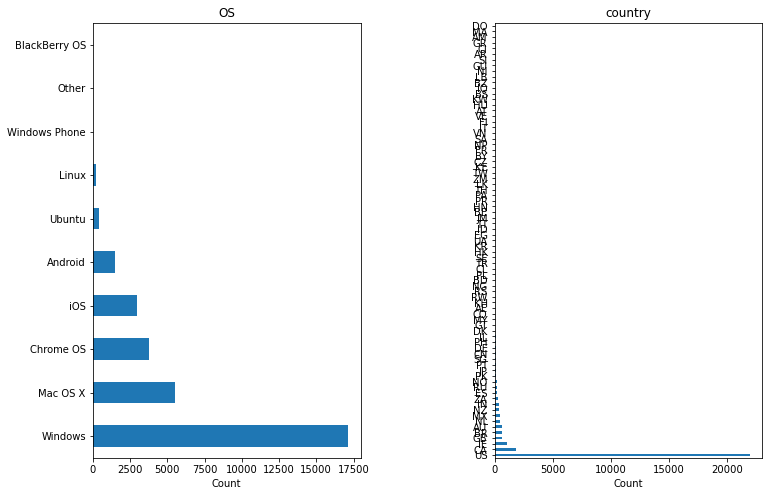

In [26]:
# Conversion is of interest as it shows what the user is doing per a session, thus, 
# analyze the distrobution of conversion on OS and country
fig, ax = plt.subplots(1, 2, figsize=(12,8))
# OS
khan_data.OS.value_counts().plot(kind='barh', ax=ax[0])
ax[0].set_title('OS')
ax[0].set_xlabel('Count')

# country
khan_data.country.value_counts().plot(kind='barh', ax=ax[1])
ax[1].set_title('country')
ax[1].set_xlabel('Count')


#Give the subplots a little "breathing room" with a wspace of 0.5
plt.subplots_adjust(wspace=0.5);

In [27]:
# We can see that the majoirty is Windows users and desktop usage is greater than mobile usage
# US is by far the biggest country to using Khan with Canada being a faraway second

In [28]:
# user_id should be looked at lastly as the values repeat, checking for number of unique values 
khan_data[['user_id']].nunique()

user_id    1664
dtype: int64

In [29]:
khan_data['user_id'].value_counts().head(20)

6700738932649094001    962
5991144387626157001    960
3592083520406841001    414
780040238317029001     392
6956704960789543001    371
8584499678653463001    371
4067962852358803001    294
1528985320524694001    282
1312488934647287001    261
1526578723024217001    230
8379266864292405001    216
3189531367086897001    209
7121094560810586001    205
2299220307677654001    202
1117616218360859001    195
8815392193141107001    195
8230684565656460001    188
2836258172236817001    180
5059945143700077001    177
4325212730846925001    164
Name: user_id, dtype: int64

In [30]:
# We can see that some users are very active with their user id appearing multiple times,
# Now need to set up data so that users returning is defined as retention 

In [31]:
user_counts = khan_data['user_id'].value_counts()
khan_data[khan_data['user_id'].isin(user_counts.index[user_counts>1])]

,timestamp,user_id,session_id,country,language,user_registered_flag,device_type,KA_app_flag,OS,URI,conversion,day,date,time_sec,time_min
0,2016-02-18 18:05:34.408245 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,login,2016-02-18,2016-02-18 18:05:34.408245,18:05:34.408245,18:06:00
1,2016-02-18 18:05:35.156166 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,homepage_view,2016-02-18,2016-02-18 18:05:35.156166,18:05:35.156166,18:06:00
2,2016-02-18 18:05:44.033396 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/welcome""",pageview,2016-02-18,2016-02-18 18:05:44.033396,18:05:44.033396,18:06:00
3,2016-02-18 18:06:39.681943 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/math/cc-third-grade-math""",pageview,2016-02-18,2016-02-18 18:06:39.681943,18:06:39.681943,18:07:00
4,2016-02-18 18:06:55.040427 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/mission/cc-third-grade-math""",pageview,2016-02-18,2016-02-18 18:06:55.040427,18:06:55.040427,18:07:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31474,2016-02-17 04:50:44.80639 UTC,9217430421418490001,4776485044606531534,US,en,False,phone,False,iOS,NaN,video_started,2016-02-17,2016-02-17 04:50:44.806390,04:50:44.806390,04:51:00
31475,2016-02-17 04:54:24.951925 UTC,9217430421418490001,4776485044606531534,US,en,False,phone,False,iOS,NaN,video_completed,2016-02-17,2016-02-17 04:54:24.951925,04:54:24.951925,04:54:00
31476,2016-02-17 04:55:55.155721 UTC,9217430421418490001,4776485044606531534,US,en,False,phone,False,iOS,"""/math/integral-calculus/integration-technique...",pageview,2016-02-17,2016-02-17 04:55:55.155721,04:55:55.155721,04:56:00
31477,2016-02-17 04:57:49.804066 UTC,9217430421418490001,4776485044606531534,US,en,False,phone,False,iOS,NaN,video_started,2016-02-17,2016-02-17 04:57:49.804066,04:57:49.804066,04:58:00


In [32]:
# Around 300 rows were removed, these rows are those that the user does not return
# we can see that the data logs each action, thus, session id is repeated discuss with Yuna next steps 
# on seperating retention

In [33]:
# observing unique session id
khan_data[['session_id']].nunique()

session_id    3328
dtype: int64

In [34]:
# unique user_id = 1664 , unique session_id = 3328
# We can see that users are returing on average 2x
# need to create column where 

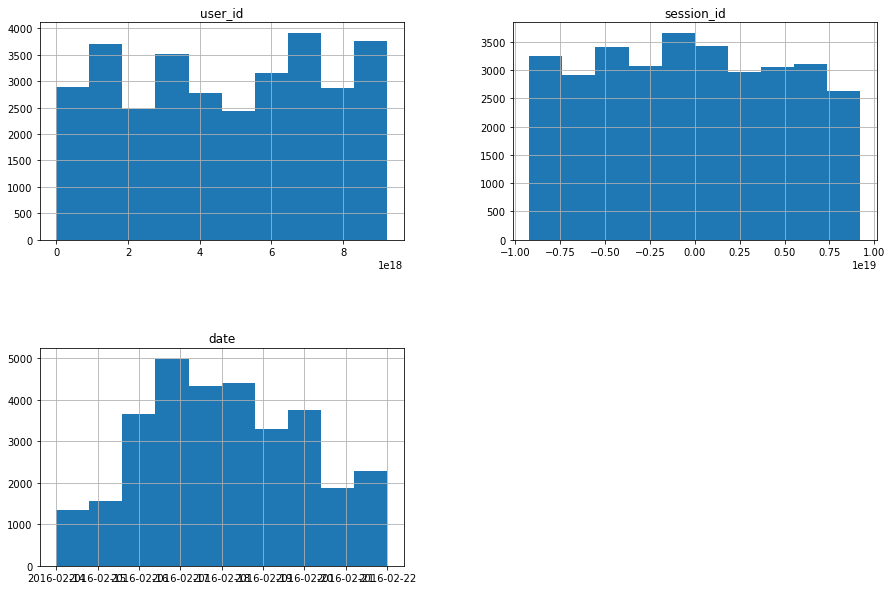

In [35]:
#Distrobution of features
khan_data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

In [36]:
# Can see that all the data is from Feburary 2016 so this is truely a one month snapshot

# pandas has functions to calculate time difference (row difference pandas). Time difference over 4,6,8 hours then call it a return user
# 1. caluclate if the user is a return user or not, and then group by user_id.max, then if else max time difference > 4 hours it is returned user if not its not a returned user
# 2. aggregate to the user level for each user how many sessions they did

#URI if else and filter if they have a subject at the end. Write a function that takes last part of / (after /)
# Then give me the final part of the final dash

In [37]:
khan_data.dtypes

timestamp                       object
user_id                          int64
session_id                       int64
country                         object
language                        object
user_registered_flag              bool
device_type                     object
KA_app_flag                       bool
OS                              object
URI                             object
conversion                      object
day                             object
date                    datetime64[ns]
time_sec                        object
time_min                        object
dtype: object

In [38]:
khan_data['match'] = khan_data.user_id == khan_data.user_id.shift()

In [39]:
#THIS ONE WORKS
khan_data['diff'] = khan_data.sort_values(['user_id','date']).groupby('user_id')['date'].diff()

#Need to put an if else statment where if user_id changes put null value (recalculate) and reset time_delta
# tip: create multiple temporary data frames to do it step by step google python pandas (what i want to achieve)

In [40]:
khan_data.head(5)

,timestamp,user_id,session_id,country,language,user_registered_flag,device_type,KA_app_flag,OS,URI,conversion,day,date,time_sec,time_min,match,diff
0,2016-02-18 18:05:34.408245 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,login,2016-02-18,2016-02-18 18:05:34.408245,18:05:34.408245,18:06:00,False,NaT
1,2016-02-18 18:05:35.156166 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,homepage_view,2016-02-18,2016-02-18 18:05:35.156166,18:05:35.156166,18:06:00,True,0 days 00:00:00.747921
2,2016-02-18 18:05:44.033396 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/welcome""",pageview,2016-02-18,2016-02-18 18:05:44.033396,18:05:44.033396,18:06:00,True,0 days 00:00:08.877230
3,2016-02-18 18:06:39.681943 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/math/cc-third-grade-math""",pageview,2016-02-18,2016-02-18 18:06:39.681943,18:06:39.681943,18:07:00,True,0 days 00:00:55.648547
4,2016-02-18 18:06:55.040427 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/mission/cc-third-grade-math""",pageview,2016-02-18,2016-02-18 18:06:55.040427,18:06:55.040427,18:07:00,True,0 days 00:00:15.358484


In [41]:
khan_data.iloc[70:75]

,timestamp,user_id,session_id,country,language,user_registered_flag,device_type,KA_app_flag,OS,URI,conversion,day,date,time_sec,time_min,match,diff
70,2016-02-18 18:45:20.629587 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/mission/cc-third-grade-math/task/52670743575...",pageview,2016-02-18,2016-02-18 18:45:20.629587,18:45:20.629587,18:45:00,True,0 days 00:00:29.927343
71,2016-02-18 18:52:16.518205 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/mission/cc-third-grade-math""",pageview,2016-02-18,2016-02-18 18:52:16.518205,18:52:16.518205,18:52:00,True,0 days 00:06:55.888618
72,2016-02-18 18:52:21.778533 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/mission/cc-third-grade-math/task/52670743575...",pageview,2016-02-18,2016-02-18 18:52:21.778533,18:52:21.778533,18:52:00,True,0 days 00:00:05.260328
73,2016-02-19 15:51:17.999457 UTC,461023995001001,-5655212259149079409,US,en,True,desktop,False,Windows,"""/""",pageview,2016-02-19,2016-02-19 15:51:17.999457,15:51:17.999457,15:51:00,True,0 days 20:58:56.220924
74,2016-02-19 15:51:44.321288 UTC,461023995001001,-5655212259149079409,US,en,True,desktop,False,Windows,"""/mission/cc-fifth-grade-math""",pageview,2016-02-19,2016-02-19 15:51:44.321288,15:51:44.321288,15:52:00,True,0 days 00:00:26.321831


In [42]:
khan_data['diff_h'] = khan_data['diff'].dt.components['hours']

In [43]:
khan_data['returned_user'] = np.where(((khan_data['diff_h'] > 4) & (khan_data['match'] == True)), 1, 0)

In [44]:
khan_data['returned_user'].value_counts()

0    30677
1      804
Name: returned_user, dtype: int64

In [45]:
khan_data.iloc[70:75]

,timestamp,user_id,session_id,country,language,user_registered_flag,device_type,KA_app_flag,OS,URI,conversion,day,date,time_sec,time_min,match,diff,diff_h,returned_user
70,2016-02-18 18:45:20.629587 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/mission/cc-third-grade-math/task/52670743575...",pageview,2016-02-18,2016-02-18 18:45:20.629587,18:45:20.629587,18:45:00,True,0 days 00:00:29.927343,0.0,0
71,2016-02-18 18:52:16.518205 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/mission/cc-third-grade-math""",pageview,2016-02-18,2016-02-18 18:52:16.518205,18:52:16.518205,18:52:00,True,0 days 00:06:55.888618,0.0,0
72,2016-02-18 18:52:21.778533 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/mission/cc-third-grade-math/task/52670743575...",pageview,2016-02-18,2016-02-18 18:52:21.778533,18:52:21.778533,18:52:00,True,0 days 00:00:05.260328,0.0,0
73,2016-02-19 15:51:17.999457 UTC,461023995001001,-5655212259149079409,US,en,True,desktop,False,Windows,"""/""",pageview,2016-02-19,2016-02-19 15:51:17.999457,15:51:17.999457,15:51:00,True,0 days 20:58:56.220924,20.0,1
74,2016-02-19 15:51:44.321288 UTC,461023995001001,-5655212259149079409,US,en,True,desktop,False,Windows,"""/mission/cc-fifth-grade-math""",pageview,2016-02-19,2016-02-19 15:51:44.321288,15:51:44.321288,15:52:00,True,0 days 00:00:26.321831,0.0,0


In [46]:
khan_data.iloc[135:154]

,timestamp,user_id,session_id,country,language,user_registered_flag,device_type,KA_app_flag,OS,URI,conversion,day,date,time_sec,time_min,match,diff,diff_h,returned_user
135,2016-02-19 16:16:47.275384 UTC,461023995001001,-5655212259149079409,US,en,True,desktop,False,Windows,"""/mission/cc-fifth-grade-math/task/65514611748...",pageview,2016-02-19,2016-02-19 16:16:47.275384,16:16:47.275384,16:17:00,True,0 days 00:00:05.360672,0.0,0
136,2016-02-19 16:19:04.310765 UTC,461023995001001,-5655212259149079409,US,en,True,desktop,False,Windows,"""/mission/cc-fifth-grade-math""",pageview,2016-02-19,2016-02-19 16:19:04.310765,16:19:04.310765,16:19:00,True,0 days 00:02:17.035381,0.0,0
137,2016-02-19 16:19:08.373176 UTC,461023995001001,-5655212259149079409,US,en,True,desktop,False,Windows,"""/mission/cc-fifth-grade-math/task/57963833756...",pageview,2016-02-19,2016-02-19 16:19:08.373176,16:19:08.373176,16:19:00,True,0 days 00:00:04.062411,0.0,0
138,2016-02-19 16:19:11.355615 UTC,461023995001001,-5655212259149079409,US,en,True,desktop,False,Windows,"""/mission/cc-fifth-grade-math""",pageview,2016-02-19,2016-02-19 16:19:11.355615,16:19:11.355615,16:19:00,True,0 days 00:00:02.982439,0.0,0
139,2016-02-20 00:24:28.660648 UTC,3899589871790001,1409488695428355150,US,en,True,desktop,False,Windows,NaN,registration,2016-02-20,2016-02-20 00:24:28.660648,00:24:28.660648,00:24:00,False,NaT,NaN,0
140,2016-02-20 00:24:28.660648 UTC,3899589871790001,1409488695428355150,US,en,True,desktop,False,Windows,NaN,login,2016-02-20,2016-02-20 00:24:28.660648,00:24:28.660648,00:24:00,True,0 days 00:00:00,0.0,0
141,2016-02-20 00:24:29.724111 UTC,3899589871790001,1409488695428355150,US,en,True,desktop,False,Windows,NaN,homepage_view,2016-02-20,2016-02-20 00:24:29.724111,00:24:29.724111,00:24:00,True,0 days 00:00:01.063463,0.0,0
142,2016-02-20 00:24:32.339668 UTC,3899589871790001,1409488695428355150,US,en,True,desktop,False,Windows,"""/welcome""",pageview,2016-02-20,2016-02-20 00:24:32.339668,00:24:32.339668,00:25:00,True,0 days 00:00:02.615557,0.0,0
143,2016-02-20 00:27:32.778359 UTC,3899589871790001,1409488695428355150,US,en,True,desktop,False,Windows,"""/science/cosmology-and-astronomy""",pageview,2016-02-20,2016-02-20 00:27:32.778359,00:27:32.778359,00:28:00,True,0 days 00:03:00.438691,0.0,0
144,2016-02-20 00:27:56.666301 UTC,3899589871790001,1409488695428355150,US,en,True,desktop,False,Windows,"""/science/cosmology-and-astronomy/universe-sca...",pageview,2016-02-20,2016-02-20 00:27:56.666301,00:27:56.666301,00:28:00,True,0 days 00:00:23.887942,0.0,0


In [47]:
returned = khan_data[khan_data['returned_user'] == 1]

In [48]:
returned.groupby('user_id').count()

,timestamp,session_id,country,language,user_registered_flag,device_type,KA_app_flag,OS,URI,conversion,day,date,time_sec,time_min,match,diff,diff_h,returned_user
user_id,,,,,,,,,,,,,,,,,,
461023995001001,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
9396148830887001,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
74637567607782001,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
81767633900011001,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2
83959543776228001,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9122425802682030001,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
9159091238978455001,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
9163646750174043001,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


In [49]:
khan_data[['user_id']].nunique()

user_id    1664
dtype: int64

In [50]:
returned[['user_id']].nunique()

user_id    432
dtype: int64

In [51]:
returned = returned.reset_index()
returned.head(20)

,index,timestamp,user_id,session_id,country,language,user_registered_flag,device_type,KA_app_flag,OS,URI,conversion,day,date,time_sec,time_min,match,diff,diff_h,returned_user
0,73,2016-02-19 15:51:17.999457 UTC,461023995001001,-5655212259149079409,US,en,True,desktop,False,Windows,"""/""",pageview,2016-02-19,2016-02-19 15:51:17.999457,15:51:17.999457,15:51:00,True,0 days 20:58:56.220924,20.0,1
1,206,2016-02-20 03:41:37.890717 UTC,9396148830887001,-778335911492825326,US,en,False,tablet,False,iOS,"""/science/health-and-medicine/human-anatomy-an...",pageview,2016-02-20,2016-02-20 03:41:37.890717,03:41:37.890717,03:42:00,True,1 days 21:34:09.945983,21.0,1
2,235,2016-02-21 15:26:33.191308 UTC,74637567607782001,7162126794463536697,AE,en,True,desktop,False,Windows,NaN,login,2016-02-21,2016-02-21 15:26:33.191308,15:26:33.191308,15:27:00,True,0 days 21:10:12.121283,21.0,1
3,264,2016-02-15 01:21:25.766443 UTC,81767633900011001,-5759801475577559507,US,en,True,desktop,False,Mac OS X,"""/mission/geometry""",pageview,2016-02-15,2016-02-15 01:21:25.766443,01:21:25.766443,01:21:00,True,0 days 07:27:33.666827,7.0,1
4,272,2016-02-21 17:04:15.023822 UTC,81767633900011001,7119046949360524718,US,en,True,desktop,False,Mac OS X,NaN,login,2016-02-21,2016-02-21 17:04:15.023822,17:04:15.023822,17:04:00,True,6 days 15:37:35.597415,15.0,1
5,280,2016-02-16 21:39:19.189206 UTC,83959543776228001,-127429400551229304,NZ,en,True,desktop,False,Windows,"""/""",pageview,2016-02-16,2016-02-16 21:39:19.189206,21:39:19.189206,21:39:00,True,1 days 21:00:39.064794,21.0,1
6,311,2016-02-21 00:40:10.54962 UTC,83959543776228001,-6665995564916180123,NZ,en,True,desktop,False,Windows,"""/""",pageview,2016-02-21,2016-02-21 00:40:10.549620,00:40:10.549620,00:40:00,True,2 days 22:46:41.935825,22.0,1
7,315,2016-02-15 15:39:46.357501 UTC,88552952056889001,-2319449693982607927,US,en,False,desktop,False,Mac OS X,"""/""",pageview,2016-02-15,2016-02-15 15:39:46.357501,15:39:46.357501,15:40:00,True,0 days 22:58:23.327949,22.0,1
8,325,2016-02-15 22:45:23.497992 UTC,88552952056889001,9154938295799999082,US,en,False,desktop,False,Mac OS X,"""/""",pageview,2016-02-15,2016-02-15 22:45:23.497992,22:45:23.497992,22:45:00,True,0 days 06:37:38.065977,6.0,1
9,417,2016-02-18 16:42:06.661072 UTC,99091149470195001,-3662366741293563969,US,en,True,desktop,False,Chrome OS,"""/""",pageview,2016-02-18,2016-02-18 16:42:06.661072,16:42:06.661072,16:42:00,True,0 days 23:31:58.400949,23.0,1


In [52]:
returned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   index                 804 non-null    int64          
 1   timestamp             804 non-null    object         
 2   user_id               804 non-null    int64          
 3   session_id            804 non-null    int64          
 4   country               804 non-null    object         
 5   language              804 non-null    object         
 6   user_registered_flag  804 non-null    bool           
 7   device_type           804 non-null    object         
 8   KA_app_flag           804 non-null    bool           
 9   OS                    804 non-null    object         
 10  URI                   606 non-null    object         
 11  conversion            804 non-null    object         
 12  day                   804 non-null    object         
 13  date 

In [53]:
returned['session_id'].value_counts()

-5655212259149079409    1
 4444074065010794454    1
-2998131545417160170    1
-351508872039568201     1
 9010547882278915327    1
                       ..
 1720490520304828431    1
-1769081712700321762    1
 2954825725944161969    1
-8117201924610240538    1
-7512668114897161685    1
Name: session_id, Length: 804, dtype: int64

In [54]:
returned.groupby(["user_id"])["session_id"].count().reset_index().sort_values(['session_id'], ascending=False)

,user_id,session_id
412,8815392193141107001,13
420,8974302283035418001,11
400,8584499678653463001,11
306,6700738932649094001,11
275,5991144387626157001,9
...,...,...
179,3693660660707300001,1
173,3621265946924461001,1
171,3524502988538503001,1
168,3442531950538405001,1


In [55]:
khan_data.head()

,timestamp,user_id,session_id,country,language,user_registered_flag,device_type,KA_app_flag,OS,URI,conversion,day,date,time_sec,time_min,match,diff,diff_h,returned_user
0,2016-02-18 18:05:34.408245 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,login,2016-02-18,2016-02-18 18:05:34.408245,18:05:34.408245,18:06:00,False,NaT,NaN,0
1,2016-02-18 18:05:35.156166 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,homepage_view,2016-02-18,2016-02-18 18:05:35.156166,18:05:35.156166,18:06:00,True,0 days 00:00:00.747921,0.0,0
2,2016-02-18 18:05:44.033396 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/welcome""",pageview,2016-02-18,2016-02-18 18:05:44.033396,18:05:44.033396,18:06:00,True,0 days 00:00:08.877230,0.0,0
3,2016-02-18 18:06:39.681943 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/math/cc-third-grade-math""",pageview,2016-02-18,2016-02-18 18:06:39.681943,18:06:39.681943,18:07:00,True,0 days 00:00:55.648547,0.0,0
4,2016-02-18 18:06:55.040427 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/mission/cc-third-grade-math""",pageview,2016-02-18,2016-02-18 18:06:55.040427,18:06:55.040427,18:07:00,True,0 days 00:00:15.358484,0.0,0


In [56]:
#datapath = './data/'
khan_data.to_csv('./data/khan_data_cleaned.csv')

In [57]:
# Make it that all users who are returned are labeled as returned user
returner = pd.DataFrame(khan_data, columns=['user_id', 'returned_user'])
returner.head()

,user_id,returned_user
0,461023995001001,0
1,461023995001001,0
2,461023995001001,0
3,461023995001001,0
4,461023995001001,0


In [58]:
df = khan_data.groupby('user_id').sum('returned_user')

In [59]:
khan_data[khan_data['user_id'] == 461023995001001] 

,timestamp,user_id,session_id,country,language,user_registered_flag,device_type,KA_app_flag,OS,URI,conversion,day,date,time_sec,time_min,match,diff,diff_h,returned_user
0,2016-02-18 18:05:34.408245 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,login,2016-02-18,2016-02-18 18:05:34.408245,18:05:34.408245,18:06:00,False,NaT,NaN,0
1,2016-02-18 18:05:35.156166 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,homepage_view,2016-02-18,2016-02-18 18:05:35.156166,18:05:35.156166,18:06:00,True,0 days 00:00:00.747921,0.0,0
2,2016-02-18 18:05:44.033396 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/welcome""",pageview,2016-02-18,2016-02-18 18:05:44.033396,18:05:44.033396,18:06:00,True,0 days 00:00:08.877230,0.0,0
3,2016-02-18 18:06:39.681943 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/math/cc-third-grade-math""",pageview,2016-02-18,2016-02-18 18:06:39.681943,18:06:39.681943,18:07:00,True,0 days 00:00:55.648547,0.0,0
4,2016-02-18 18:06:55.040427 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/mission/cc-third-grade-math""",pageview,2016-02-18,2016-02-18 18:06:55.040427,18:06:55.040427,18:07:00,True,0 days 00:00:15.358484,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,2016-02-19 16:16:41.914712 UTC,461023995001001,-5655212259149079409,US,en,True,desktop,False,Windows,"""/mission/cc-fifth-grade-math""",pageview,2016-02-19,2016-02-19 16:16:41.914712,16:16:41.914712,16:17:00,True,0 days 00:00:07.609379,0.0,0
135,2016-02-19 16:16:47.275384 UTC,461023995001001,-5655212259149079409,US,en,True,desktop,False,Windows,"""/mission/cc-fifth-grade-math/task/65514611748...",pageview,2016-02-19,2016-02-19 16:16:47.275384,16:16:47.275384,16:17:00,True,0 days 00:00:05.360672,0.0,0
136,2016-02-19 16:19:04.310765 UTC,461023995001001,-5655212259149079409,US,en,True,desktop,False,Windows,"""/mission/cc-fifth-grade-math""",pageview,2016-02-19,2016-02-19 16:19:04.310765,16:19:04.310765,16:19:00,True,0 days 00:02:17.035381,0.0,0
137,2016-02-19 16:19:08.373176 UTC,461023995001001,-5655212259149079409,US,en,True,desktop,False,Windows,"""/mission/cc-fifth-grade-math/task/57963833756...",pageview,2016-02-19,2016-02-19 16:19:08.373176,16:19:08.373176,16:19:00,True,0 days 00:00:04.062411,0.0,0


In [60]:
df.head(10)

,session_id,user_registered_flag,KA_app_flag,match,diff_h,returned_user
user_id,,,,,,
461023995001001,1.574111e+20,139,0,138,20.0,1
3899589871790001,1.268540e+19,9,0,8,0.0,0
6937833080824001,-3.123441e+19,0,0,3,0.0,0
8828372710491001,-1.650525e+20,0,0,46,0.0,0
9396148830887001,-5.837858e+18,0,0,10,21.0,1
14446863370768001,-2.298802e+18,0,0,0,0.0,0
24951207346757001,1.389461e+19,0,0,1,0.0,0
26798923230688001,4.051390e+17,0,0,0,0.0,0
30823276707008001,-2.669265e+19,0,0,4,3.0,0


In [61]:
df1 = khan_data.groupby('user_id')['returned_user'].agg('sum').reset_index()

In [62]:
df1.head()

,user_id,returned_user
0,461023995001001,1
1,3899589871790001,0
2,6937833080824001,0
3,8828372710491001,0
4,9396148830887001,1


In [63]:
rawdf = pd.read_csv('./data/candidate_test_funnel_data.csv')

In [64]:
kdf = pd.merge(rawdf, df1, on='user_id', how='left')

In [65]:
kdf.head()

,timestamp,user_id,session_id,country,language,user_registered_flag,device_type,KA_app_flag,OS,product,domain,subject,topic,tutorial,mission,URI,conversion,video_slug,video_title,returned_user
0,2016-02-18 18:05:34.408245 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,NaN,NaN,NaN,NaN,NaN,NaN,login,NaN,NaN,1
1,2016-02-18 18:05:35.156166 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,NaN,NaN,NaN,NaN,NaN,NaN,homepage_view,NaN,NaN,1
2,2016-02-18 18:05:44.033396 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,NaN,NaN,NaN,NaN,NaN,"""/welcome""",pageview,NaN,NaN,1
3,2016-02-18 18:06:39.681943 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,NaN,NaN,NaN,NaN,NaN,"""/math/cc-third-grade-math""",pageview,NaN,NaN,1
4,2016-02-18 18:06:55.040427 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,NaN,NaN,NaN,NaN,NaN,"""/mission/cc-third-grade-math""",pageview,NaN,NaN,1


In [66]:
kdf['returner'] = np.where(kdf['returned_user'] == 0, 'No', 'Yes')

In [67]:
kdf.head()

,timestamp,user_id,session_id,country,language,user_registered_flag,device_type,KA_app_flag,OS,product,...,subject,topic,tutorial,mission,URI,conversion,video_slug,video_title,returned_user,returner
0,2016-02-18 18:05:34.408245 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,...,NaN,NaN,NaN,NaN,NaN,login,NaN,NaN,1,Yes
1,2016-02-18 18:05:35.156166 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,...,NaN,NaN,NaN,NaN,NaN,homepage_view,NaN,NaN,1,Yes
2,2016-02-18 18:05:44.033396 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,...,NaN,NaN,NaN,NaN,"""/welcome""",pageview,NaN,NaN,1,Yes
3,2016-02-18 18:06:39.681943 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,...,NaN,NaN,NaN,NaN,"""/math/cc-third-grade-math""",pageview,NaN,NaN,1,Yes
4,2016-02-18 18:06:55.040427 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,...,NaN,NaN,NaN,NaN,"""/mission/cc-third-grade-math""",pageview,NaN,NaN,1,Yes


In [73]:
sorted(kdf)

['KA_app_flag',
 'OS',
 'URI',
 'conversion',
 'country',
 'device_type',
 'domain',
 'language',
 'mission',
 'product',
 'returned_user',
 'returner',
 'session_id',
 'subject',
 'timestamp',
 'topic',
 'tutorial',
 'user_id',
 'user_registered_flag',
 'video_slug',
 'video_title']

In [79]:
kdf.isna().sum()

timestamp                   0
user_id                     0
session_id                  0
country                     0
language                    0
user_registered_flag        0
device_type                 0
KA_app_flag                 0
OS                          0
product                 27252
domain                  28158
subject                 28147
topic                   28331
tutorial                28260
mission                 31203
URI                      5332
conversion                  0
video_slug              24098
video_title             27590
returned_user               0
returner                    0
dtype: int64

In [80]:
kdf.drop(columns=['product','domain','subject','topic','tutorial','mission','video_slug','video_title'],inplace=True)

In [81]:
kdf.head(5)

,timestamp,user_id,session_id,country,language,user_registered_flag,device_type,KA_app_flag,OS,URI,conversion,returned_user,returner
0,2016-02-18 18:05:34.408245 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,login,1,Yes
1,2016-02-18 18:05:35.156166 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,homepage_view,1,Yes
2,2016-02-18 18:05:44.033396 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/welcome""",pageview,1,Yes
3,2016-02-18 18:06:39.681943 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/math/cc-third-grade-math""",pageview,1,Yes
4,2016-02-18 18:06:55.040427 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/mission/cc-third-grade-math""",pageview,1,Yes


In [82]:
kdf.to_csv('./data/return_user.csv')